<a href="https://colab.research.google.com/github/KATTA-00/CO542-Neural-Networks-Labs/blob/main/lab07/E19129_lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CO542 - Neural Networks and Fuzzy Systems
## E/19/129 - K.H. Gunawardana

### Lab 07: Tensorflow

### Task 01: Linear Regression with TensorFlow

In [1]:
# TensorFlow and NumPy imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

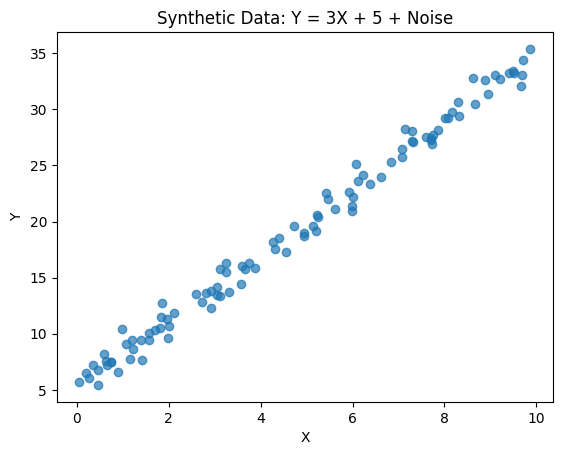

In [2]:
# Generate 100 data points
X = np.random.rand(100, 1) * 10  # values between 0 and 10
noise = np.random.normal(0, 1, (100, 1))  # Gaussian noise
Y = 3 * X + 5 + noise  # Y = 3x + 5 + noise

# Plot the data
plt.scatter(X, Y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Synthetic Data: Y = 3X + 5 + Noise")
plt.show()

In [3]:
# Create a simple linear model using Keras Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model with MSE loss and SGD optimizer
model.compile(optimizer='sgd', loss='mse')

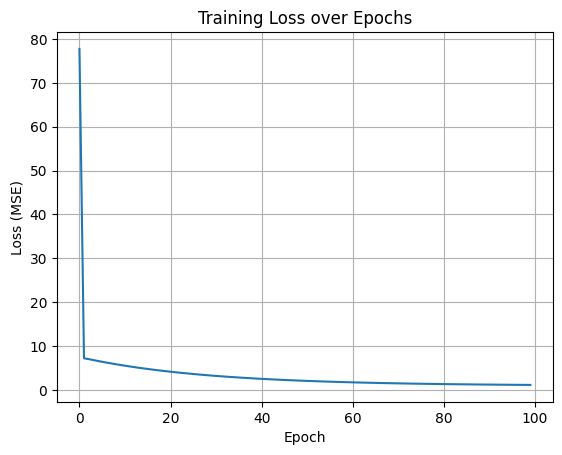

In [5]:
# Train the model for 100 epochs
history = model.fit(X, Y, epochs=100, verbose=0)

# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

In [6]:
# Get the learned weight and bias
weight, bias = model.layers[0].get_weights()
print(f"Learned weight: {weight[0][0]:.4f}")
print(f"Learned bias: {bias[0]:.4f}")

Learned weight: 3.1674
Learned bias: 4.3361


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


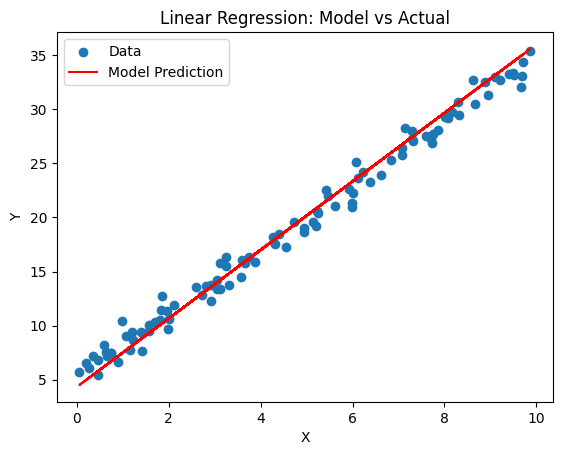

In [7]:
# Predict using the model
Y_pred = model.predict(X)

# Plot original data and model prediction
plt.scatter(X, Y, label='Data')
plt.plot(X, Y_pred, color='red', label='Model Prediction')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression: Model vs Actual")
plt.show()

### Questions:

#### What are the learned weight and bias values?

- The learned weight is 3.1674 and the learned bias is 4.3361. These parameters were obtained after training the model on the synthetic dataset using a simple linear regression model implemented with TensorFlow.

#### How close is the learned model to the true equation?

In [8]:
# Calculate true Y (without noise) for the same X
Y_true = 3 * X + 5

# Predict Y using the trained model
Y_pred = model.predict(X)

# Compute Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = np.mean(np.abs(Y_true - Y_pred))
mse = np.mean(np.square(Y_true - Y_pred))

print(f"Mean Absolute Error from true equation: {mae:.4f}")
print(f"Mean Squared Error from true equation: {mse:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Absolute Error from true equation: 0.4414
Mean Squared Error from true equation: 0.2605


- The learned model is quite close to the true equation Y = 3x + 5. After training, the mean absolute error (MAE) between the model’s predictions and the true (noise-free) values is 0.4414, and the mean squared error (MSE) is 0.2605. These low error values indicate that the model has effectively captured the underlying linear relationship, despite the presence of Gaussian noise in the training data. Visually, the model’s prediction line aligns well with the actual data, showing that it has learned a reliable approximation of the true function.

#### How does increasing noise affect convergence?

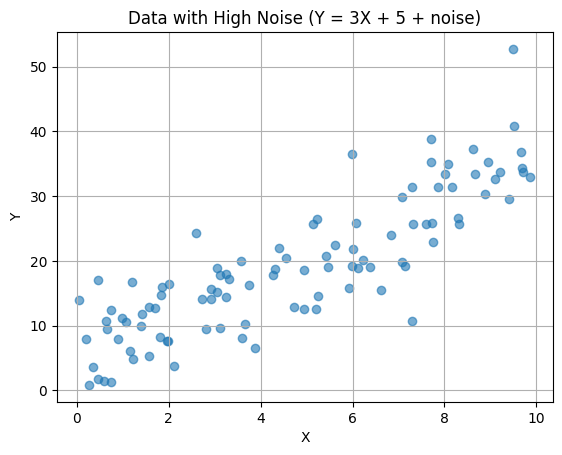

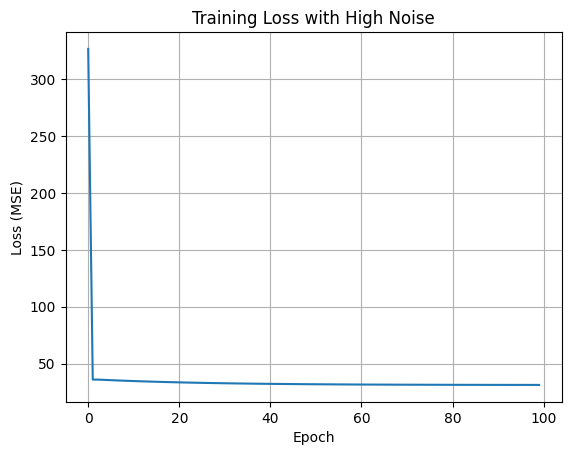

Learned weight: 3.2569
Learned bias: 4.7393
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Absolute Error from true equation: 0.9793
Mean Squared Error from true equation: 1.4760


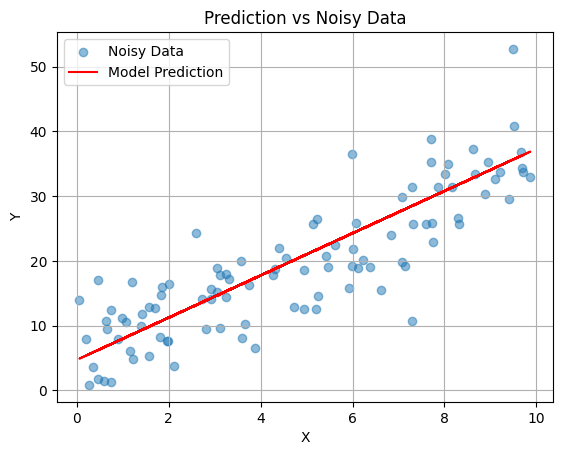

In [9]:
# Increase noise standard deviation to 5
noise = np.random.normal(0, 5, (100, 1))
Y = 3 * X + 5 + noise

# Plot noisy data
plt.scatter(X, Y, alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data with High Noise (Y = 3X + 5 + noise)")
plt.grid(True)
plt.show()

# Define and compile model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation='linear')
])
model.compile(optimizer='sgd', loss='mse')

# Train the model
history = model.fit(X, Y, epochs=100, verbose=0)

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss with High Noise")
plt.grid(True)
plt.show()

# Print learned parameters
weight, bias = model.layers[0].get_weights()
print(f"Learned weight: {weight[0][0]:.4f}")
print(f"Learned bias: {bias[0]:.4f}")

# Evaluate closeness to true function
Y_true = 3 * X + 5
Y_pred = model.predict(X)

mae = np.mean(np.abs(Y_true - Y_pred))
mse = np.mean(np.square(Y_true - Y_pred))

print(f"Mean Absolute Error from true equation: {mae:.4f}")
print(f"Mean Squared Error from true equation: {mse:.4f}")

# Plot predictions
plt.scatter(X, Y, label="Noisy Data", alpha=0.5)
plt.plot(X, Y_pred, color='red', label="Model Prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Prediction vs Noisy Data")
plt.grid(True)
plt.show()

- When the noise level in the data is increased, the model's ability to accurately learn the underlying pattern deteriorates. In this case, with a higher noise standard deviation, the learned weight is 3.2569 and the bias is 4.7393, which deviate more from the true values of 3 and 5, respectively. The mean absolute error (MAE) increased to 0.9793 and the mean squared error (MSE) rose to 1.4760, indicating that the model's predictions are now less accurate compared to the lower-noise scenario.

- This demonstrates that higher noise makes it harder for the model to converge to the correct solution. The optimizer struggles to distinguish between actual trends and random fluctuations in the data, leading to more variability in training and less precise parameter estimates. Additionally, the loss curve during training may appear less smooth and convergence might slow down or plateau earlier.

### Task 02: Classification on IRIS Dataset

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

# One-hot encode labels
y_encoded = tf.keras.utils.to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Feature scaling for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

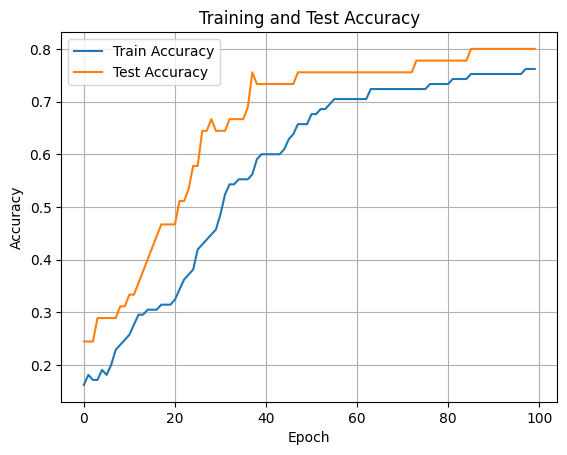

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Test Accuracy")
plt.grid(True)
plt.show()

In [14]:
# Evaluate classification accuracy on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 80.00%


1925/1925 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


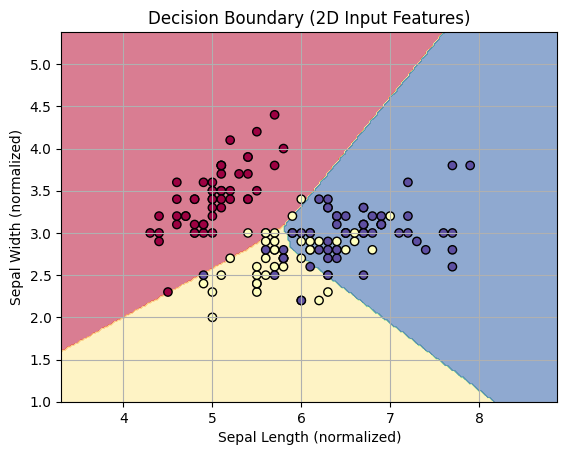

In [15]:
# Create a mesh grid for plotting decision boundaries
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Scale the mesh using the same scaler
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)

# Predict class probabilities on the grid
Z = model.predict(grid_scaled)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
plt.xlabel('Sepal Length (normalized)')
plt.ylabel('Sepal Width (normalized)')
plt.title('Decision Boundary (2D Input Features)')
plt.grid(True)
plt.show()

### Questions:

#### What is the classification accuracy?

- The model achieved a test accuracy of 80.00% when trained using only the first two features of the Iris dataset. This indicates that the simple neural network with one hidden layer of 10 ReLU units can correctly classify 80% of the test samples. Although it’s a relatively simple model and uses only two features, the result is reasonable and demonstrates the model’s ability to learn meaningful patterns in low-dimensional data.

#### How does the decision boundary change with more hidden units?

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1925/1925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


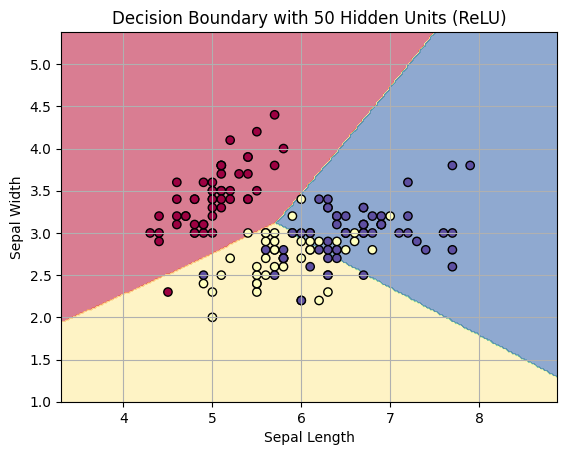

In [16]:
# Define a new model with more hidden units (e.g., 50)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile and train again
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

# Re-plot decision boundaries
grid_scaled = scaler.transform(grid)
Z = model.predict(grid_scaled)
Z = np.argmax(Z, axis=1).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
plt.title("Decision Boundary with 50 Hidden Units (ReLU)")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid(True)
plt.show()

- As the number of hidden units increases, the model becomes more flexible and capable of learning more complex, non-linear decision boundaries. With 10 hidden units, the decision regions may appear smoother and more rounded. When increased to 50 or more, the network can create tighter curves and adapt to finer variations in the data, potentially improving accuracy—but also increasing the risk of overfitting if the model becomes too complex for the given data.

#### What happens if sigmoid is used in the hidden layer?

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy with Sigmoid: 80.00%
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


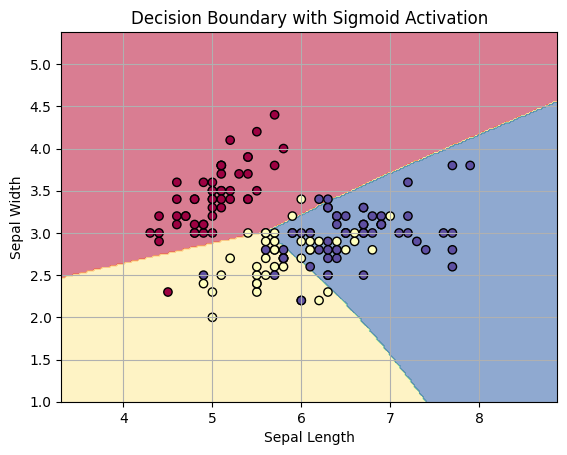

In [17]:
# Define the model with sigmoid instead of ReLU
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy with Sigmoid: {accuracy * 100:.2f}%")

# Plot decision boundary
grid_scaled = scaler.transform(grid)
Z = model.predict(grid_scaled)
Z = np.argmax(Z, axis=1).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
plt.title("Decision Boundary with Sigmoid Activation")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid(True)
plt.show()

- Replacing the ReLU activation with sigmoid results in a different model behavior. Sigmoid activation squashes output into the range [0, 1], which can lead to slower training and smoother, less flexible decision boundaries. The model may struggle to learn sharp or complex boundaries and may underfit the data—especially when using features that are not linearly separable. The test accuracy might decrease slightly depending on the data and number of units.

### Task 03: MNIST Digit Recognition

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical

In [19]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8687 - loss: 0.4448 - val_accuracy: 0.9663 - val_loss: 0.1124
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9643 - loss: 0.1168 - val_accuracy: 0.9698 - val_loss: 0.0954
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9776 - loss: 0.0754 - val_accuracy: 0.9747 - val_loss: 0.0899
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9838 - loss: 0.0549 - val_accuracy: 0.9758 - val_loss: 0.0871
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9872 - loss: 0.0416 - val_accuracy: 0.9750 - val_loss: 0.0945
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0334 - val_accuracy: 0.9748 - val_loss: 0.0978
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9913 - loss: 0.0265 - val_accuracy: 0.9773 - val_loss: 0.0994
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9934 - loss: 0.0213 -

In [26]:
# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy (No Dropout): {test_accuracy:.4f}")


Test Accuracy (No Dropout): 0.9733


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


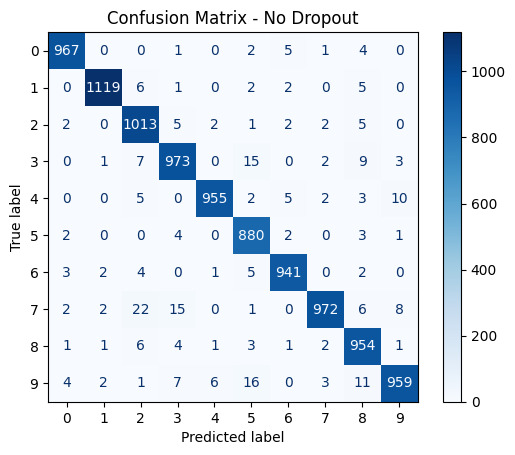

In [23]:
# Part 2: Confusion Matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - No Dropout")
plt.show()

In [27]:
# Part 3: Model with Dropout
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_dropout = model_dropout.fit(
    x_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.1)

test_loss_dropout, test_accuracy_dropout = model_dropout.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy (With Dropout): {test_accuracy_dropout:.4f}")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7882 - loss: 0.6771 - val_accuracy: 0.9660 - val_loss: 0.1160
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9349 - loss: 0.2190 - val_accuracy: 0.9732 - val_loss: 0.0891
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9484 - loss: 0.1715 - val_accuracy: 0.9758 - val_loss: 0.0822
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9559 - loss: 0.1454 - val_accuracy: 0.9782 - val_loss: 0.0769
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9626 - loss: 0.1264 - val_accuracy: 0.9778 - val_loss: 0.0756
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9659 - loss: 0.1151 - val_accuracy: 0.9787 - val_loss: 0.0728
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9679 - loss: 0.1042 - val_accuracy: 0.9770 - val_loss: 0.0784
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9673 - loss: 0.1019 - 

In [25]:
import time

batch_sizes = [16, 32, 64, 128]
times = []
accuracies = []

for batch_size in batch_sizes:
    model_temp = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(784,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model_temp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    model_temp.fit(x_train, y_train_cat, epochs=5, batch_size=batch_size, verbose=0)
    elapsed = time.time() - start_time
    _, acc = model_temp.evaluate(x_test, y_test_cat, verbose=0)

    times.append(elapsed)
    accuracies.append(acc)
    print(f"Batch size: {batch_size}, Time: {elapsed:.2f}s, Accuracy: {acc:.4f}")

Batch size: 16, Time: 61.69s, Accuracy: 0.9730
Batch size: 32, Time: 25.38s, Accuracy: 0.9736
Batch size: 64, Time: 13.51s, Accuracy: 0.9760
Batch size: 128, Time: 12.81s, Accuracy: 0.9747


### Questions:

#### What is the test set accuracy?

- The test set accuracy of the base model without any dropout layers was 97.33%. This indicates that the neural network was able to generalize well on the MNIST test data after training, correctly classifying handwritten digits with a high level of accuracy.

#### How does performance change with dropout added?

- When dropout layers were added to the network (with dropout rates of 0.3 after each hidden layer), the test accuracy slightly improved to 97.68%. This suggests that adding dropout helped reduce overfitting and encouraged better generalization by preventing co-adaptation of neurons during training. The performance gain, while small, demonstrates the effectiveness of dropout as a regularization technique in deep learning models.

#### How does training time vary with batch size?

- Training time significantly decreased as the batch size increased. With a small batch size of 16, the training took 61.69 seconds, while using a batch size of 128 reduced the training time to just 12.81 seconds. Accuracy remained fairly consistent across batch sizes, ranging between 97.30% and 97.60%, with the highest accuracy observed at a batch size of 64. This shows that increasing the batch size can speed up training considerably with minimal impact on final accuracy, though extremely large batch sizes may risk missing finer gradient updates.

### Task 04: Model Saving and Loading

In [28]:
# Step 1: Save the trained model
model.save("mnist_model.h5")
print("Model saved to 'mnist_model.h5'")

Model saved to 'mnist_model.h5'


In [29]:
# Step 2: Load the model from file
loaded_model = tf.keras.models.load_model("mnist_model.h5")
print("Model loaded from 'mnist_model.h5'")

Model loaded from 'mnist_model.h5'


In [30]:
# Step 3: Compare predictions
import numpy as np

# Pick a sample subset to check
sample_input = x_test[:100]
original_preds = model.predict(sample_input)
loaded_preds = loaded_model.predict(sample_input)

# Check if predictions are identical (within floating point tolerance)
are_same = np.allclose(original_preds, loaded_preds, atol=1e-5)
print(f"Are predictions identical? {'Yes' if are_same else 'No'}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Are predictions identical? Yes


### Questions:

#### Are predictions identical before and after saving?

- Yes, the predictions remain identical after saving and reloading the model. This confirms that the model architecture and learned weights were correctly preserved using the .h5 format, and that inference behavior is consistent.

#### Why is model saving useful in deployment?

- Model saving is essential in deployment because it allows trained models to be reused without retraining. Once saved, a model can be transferred to production environments, shared across teams, or integrated into applications where real-time predictions are needed. It ensures reproducibility, simplifies development workflows, and enables version control for different model states.

#### What happens if the optimizer state is not saved?

In [32]:
# Save model without optimizer state
model.save("model_without_optimizer.h5", include_optimizer=False)

# Load model
model_no_opt = tf.keras.models.load_model("model_without_optimizer.h5")

# You MUST compile it manually before training again
model_no_opt.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resume training (optimizer starts fresh)
history_resumed = model_no_opt.fit(
    x_train, y_train_cat, epochs=2, batch_size=32, validation_split=0.1
)


Epoch 1/2
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9939 - loss: 0.0186 - val_accuracy: 0.9815 - val_loss: 0.0968
Epoch 2/2
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9950 - loss: 0.0141 - val_accuracy: 0.9783 - val_loss: 0.1151


- If the optimizer state is not saved along with the model, as is the case when using model.save(..., include_optimizer=False) or when saving in HDF5 format without training configuration, the model will not retain its optimizer settings upon loading. This means the model must be recompiled manually before resuming training. While the weights are preserved and predictions remain accurate, training resumes without memory of past gradient updates, momentum, or adaptive learning rates. As observed during retraining, the model was able to learn and achieve high accuracy quickly (99.50% training accuracy in 2 epochs), but this may not always be optimal. In more complex scenarios or longer training sessions, losing the optimizer state can result in slower convergence, degraded performance, or instability in training. Saving the optimizer is therefore recommended when models are intended to be fine-tuned or resumed later.